<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Distance Metrics**


Estimated time needed: **45** minutes


## Use cases of Distance Metrics

- **Classification**: KNN model uses a distance metric to find a data point's top k nearest neighbors.
- **Clustering**: K-Means algorithm assigns data points to the nearest centroids using a distance metric.
- **Natural Language Processing**: NLP uses the cosine similarity distance metric to filter out irrelevant documents from the corpus once the unstructured data is transformed into vector form.


----


## Datasets

Datasets for this lab are gathered from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) under the MIT License.


In [1]:
 # All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
#!mamba install -qy pandas==1.3.4 numpy==1.21.4 matplotlib==3.5.0 scipy==1.7.3
!mamba install -qy scikit-learn==1.0.2
# Note: If your environment doesn't support "!mamba install", use "!pip install pandas==1.3.4 ... "

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... 

    Installed package of scikit-learn can be accelerated using scikit-learn-intelex.
    More details are available here: https://intel.github.io/scikit-learn-intelex

    For example:

        $ conda install scikit-learn-intelex
        $ python -m sklearnex my_application.py

    

done


Run the following cell to ensure you are using the correct version of sklearn:


In [2]:
import sklearn
if sklearn.__version__ != "1.0.2":
    raise ValueError("Please install sklearn==1.0.2 so this lab works properly")

### Importing Required Libraries


In [3]:
# Surpress any warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd
import numpy as np
import scipy

from scipy.spatial.distance import euclidean, cityblock, cosine
import sklearn.metrics.pairwise

# Import matplotlib for 3d plotting:
import matplotlib.pyplot as plt

# Make matplotlib work in jupyter notebook
%matplotlib inline

### Defining Helper Functions

In the section below, we will define helper functions that will help analyze different distance metrics

### __Average Distance__

This function will return the average distance between two sets of data given our provided distance metric, i.e., each point in $X$ with each other point in $Y$. Refer to the image below:


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/images/avg_distance.png" width="30%" height="auto/">


In [118]:
# This function will allow us to find the "average distance" between two sets of data
def avg_distance(X1, X2, distance_func):
    from sklearn.metrics import jaccard_score
    
    temp = 0
    for x1 in X1:
        for x2 in X2:
            if distance_func == jaccard_score:   # the jaccard_score function only returns jaccard_similarity
                temp += 1 - distance_func(x1, x2)
            else:
                temp += distance_func(x1, x2)  # menjumlahkan hasil dari perhitungan distance_func
                
    return temp / (len(X1) * len(X2)) # Rata dari seluruh hasil perhitungan distance yg telah dijumlahkan

### __Pairwise Distance__

This function will return the average pairwise distance between two sets of data. The distance for each row in $X$ from the corresponding row in $Y$. The number of rows of in the two sets of data should be equal. Refer to the image below:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/images/pairwise_distance.png" width="30%" height="auto">


In [78]:
# Contoh penggunaan MAP FUNCTION
X = np.array([[0, 0]], dtype=float)
Y = np.array([[3, 4]], dtype=float)
print(list(map(euclidean, X, Y)))  # map function == X dan Y tidak boleh vektor (2,) -> (2,1)

[5.0]


In [79]:
# This function will allow us to find the average pairwise distance
def avg_pairwise_distance(X1, X2, distance_func):
    return sum(map(distance_func, X1, X2)) / min(len(X1), len(X2)) # Menghitung rata2, karna menggunakan pairwise,
                                                                   # maka kita mengambil len atau panjang X dan Y 
                                                                   # yg paling minimal

## Load the datafile into `pandas.DataFrame`

Before working with the data, it must be loaded into a `pandas.DataFrame`:


In [6]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


For the purpose of this lab, we will not be using the `"petal_width"` column:


In [7]:
df.drop(['petal_width'], axis=1, inplace=True)
df.head()

,sepal_length,sepal_width,petal_length,species
0,5.1,3.5,1.4,setosa
1,4.9,3.0,1.4,setosa
2,4.7,3.2,1.3,setosa
3,4.6,3.1,1.5,setosa
4,5.0,3.6,1.4,setosa


Let's see what the different `"species"` types are in the dataset:


In [10]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Let's view the three species of irises' data in 3D using `matplotlib`


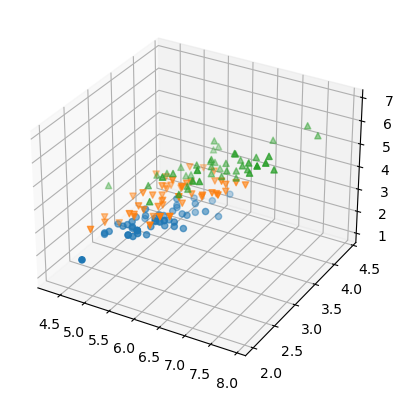

In [12]:
attrs = ['sepal_length', 'sepal_width', 'petal_length']
markers = ['o', 'v', '^']
species = df['species'].unique()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for specie, marker in zip(species, markers):
    specie_data = df.loc[df['species'] == specie][attrs]
    xs, ys, zs = [specie_data[attr] for attr in attrs]
    ax.scatter(xs, ys, zs, marker=marker)
plt.show()

Create variables for the species' data, as `np.ndarray`s:


In [13]:
setosa_data = df.loc[df['species'] == 'setosa'][attrs].to_numpy()
versicolor_data = df.loc[df['species'] == 'versicolor'][attrs].to_numpy()
virginica_data = df.loc[df['species'] == 'virginica'][attrs].to_numpy()

In a the NumPy array, each point is a row and  each column is a dimension, we can see this by using <code>shape</code>:


In [11]:
setosa_data.shape

(50, 3)

## Euclidean Distance

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/images/euclidean.png" width="30%" height="auto/">


In this task, you will learn and practice applying Euclidean distance.

Euclidean distance is simply the physical distance between two points.

_Euclidean distance is useful when physical distance matters most._

We know from high school math the distance between two points __on a plane (2D)__ $(x_1, y_1), (x_2, y_2)$ is:

$\sqrt{(x_2-x_1)^2 + (y_2-y_1)^2}$

The distance between two points in __3D__ $(x_1, y_1, z_1), (x_2, y_2, z_2)$ is:

$\sqrt{(x_2-x_1)^2 + (y_2-y_1)^2 + (z_2-z_1)^2}$

### <a id='euclidean_GE'></a> General Equation

The __general equation for the euclidean distance__ between two points in n-dimentions $\boldsymbol{a} = [a_1, a_2, \dots, a_n], \boldsymbol{b}=[b_1, b_2, \dots, b_n]$ is:

$$\sqrt{\sum_{i=1}^{n} (b_i-a_i)^2}$$

Or for those inclined to Linear Algebra:

$$|| \boldsymbol{b} - \boldsymbol{a} ||$$


We can use the function `euclidean` from `scipy.spatial.distance` to compute the euclidean distance between two points.


In [14]:
euclidean([0, 0], [3, 4])

5.0

### __Average Distance__
**Let's find the average _euclidean_ distance between the data of different species of irises**

- Average _euclidean_ distance between __setosa__ and __setosa__:
- Average euclidean distance between setosa and versicolor:
- Average euclidean distance between setosa and virginica:

In [81]:
print(avg_distance(setosa_data, setosa_data, euclidean))
print(avg_distance(setosa_data, versicolor_data, euclidean))
print(avg_distance(setosa_data, virginica_data, euclidean))

0.6637635523285276
3.111030738242983
4.470017704302476


### __Pairwise Distance__

We can also determine the  euclidean distances between two points using <code>paired_euclidean_distances</code> from <code>sklearn.metrics.pairwise</code>:


In [64]:
# Pairwise using sklearn
from sklearn.metrics.pairwise import paired_euclidean_distances

X = np.array([[0, 0]], dtype=float)
Y = np.array([[3, 4]], dtype=float)
paired_euclidean_distances(X, Y).mean()

5.0

In [82]:
# Pairwise using our own version of the function
avg_pairwise_distance(X, Y, euclidean)

5.0

As above, we can calculate the distance between each array, then average the distance as follows. 
First, we calculate the distance between each row:


In [87]:
# using pairwise sklearn
row_dist = paired_euclidean_distances(setosa_data, versicolor_data)
print(row_dist)
print(f'len = {len(row_dist)}')

# we find the average value:
print(f'average = {row_dist.mean()}')

[3.81968585 3.44963766 4.22018957 2.77488739 3.62353419 3.02324329
 3.71348893 2.06155281 3.88329757 2.45153013 2.65518361 2.85131549
 2.97321375 4.02616443 2.64764046 3.33166625 3.33016516 2.90172363
 3.26343377 2.77488739 3.14642654 2.83901391 4.39431451 3.20156212
 2.92745623 3.2249031  3.72021505 3.84057287 3.24037035 2.22934968
 2.41246762 2.41867732 2.84253408 4.02367991 3.04302481 3.45398321
 3.62767143 3.318132   3.04630924 2.68700577 3.26649659 3.73363094
 3.1        2.0808652  2.59807621 2.94108823 2.81602557 3.32565783
 1.93132079 2.83372546]
len = 50
average = 3.1208199582684055


We repeat the process:


In [21]:
paired_euclidean_distances(setosa_data, virginica_data).mean()

4.467297089536804

Now, applying our own function:


In [22]:
avg_pairwise_distance(setosa_data, virginica_data, euclidean)

4.467297089536803

## Manhattan Distance

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/images/manhattan.png" width="30%" height="auto/">


In this task, you will learn and practice applying Manhattan distance, sometimes called the  $L1$ norm and "cityblock" distance. The  Manhattan distance is even simpler than euclidean distance.

It can be described as the sum of the absolute value of the difference in each dimention of two points.

_Manhattan distance can be preferrable to euclidean distance in high-dimentional situations._

The Manhattan distance between two points __on a plane (2D)__ $(x_1, y_1), (x_2, y_2)$ is:

$|x_2 - x_1| + |y_2-y_1|$

### <a id='manhattan_GE'></a> General Equation

The __general equation for the manhattan distance__ between two points in N-dimentions $\boldsymbol{a}=[a_1, a_2, \dots, a_n], \boldsymbol{b}=[b_1, b_2, \dots, b_n]$ is:

$$ \sum_{i=1}^{n} |b_i-a_i| $$


We can use the function `cityblock` from `scipy.spatial.distance` to compute the manhattan distance between two points.


In [88]:
cityblock([0,0], [3,4])

7

### __Average Distance__
**Let's find the average _manhattan_ distance between the data of different species of irises**

Average _manhattan_ distance between __setosa__ and __setosa__:


In [24]:
avg_distance(setosa_data, setosa_data, cityblock)

0.9921600000000026

Average _manhattan_ distance between __setosa__ and __versicolor__:


In [25]:
avg_distance(setosa_data, versicolor_data, cityblock)

4.439119999999999

Average _manhattan_ distance between __setosa__ and __virginica__:


In [26]:
avg_distance(setosa_data, virginica_data, cityblock)

6.219039999999988

### __Pairwise Distance__

We can also determine the pairwise Manhattan Distances between two points using <code>manhattan_distances</code> from <code>sklearn.metrics.pairwise</code>:


In [93]:
from sklearn.metrics.pairwise import manhattan_distances
X = np.array([[0,0]])
Y = np.array([[3,4]])

manhattan_distances(X, Y)

array([[7.]])

## Cosine Distance

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/images/cosine.png" width="30%" height="auto/">


In this task, you will learn and practice applying Cosine distance.

The cosine distance between two points can be thought of as one minus the cosine of the angle between them with respect to the origin.

As such, it has a value in the range $[0, 2]$ where:
 * $0$ means "in the same direction"
 * $1$ means "perpendicular"
 * $2$ means "in the opposite direction."
 
So, **the lower the cosine distance, the more-similar two points are (in direction)**.

_Cosine distance is useful when "direction" matters more than euclidean distance_

The cosine distance between two points __on a plane (2D)__ $(x_1, y_1), (x_2, y_2)$ is:

$$1 - \frac{x_1 \cdot x_2 + y_1 \cdot y_2}{\sqrt{x_1^2 + y_1^2} + \sqrt{x_2^2 + y_2^2}}$$

### <a id='cosine_GE'></a> General Equation

The __general equation for the cosine distance__ between two points in N-dimentions $\boldsymbol{a} = [a_1, a_2, \dots, a_n], \boldsymbol{b} = [b_1, b_2, \dots, b_n]$ is:

$$1 - \frac{\sum_{i=1}^{n} a_i \cdot b_i}{\sqrt{\sum_{i=1}^{n} a_i^2} + \sqrt{\sum_{i=1}^{n} b_i^2}}$$

Or for those inclined to linear algebra:

$$1 - \frac{\boldsymbol{a} \cdot \boldsymbol{b}}{||\boldsymbol{a}|| \cdot ||\boldsymbol{b}||}$$


We can use the function `cosine` from `scipy.spatial.distance` to compute the cosine distance between two points.


In [96]:
print(cosine([0,0], [3,4]))
print(cosine([1, 1], [-1, -1]))

# 0 means "in the same direction"
# 1 means "perpendicular"
# 2 means "in the opposite direction."

0
2.0


For this exercise, we will use a different dataset.

Download the dataset `"auto-mpg.data"`, which contains information about cars from 1970 to 1982:


In [97]:
df = pd.read_csv(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/auto-mpg.data',
    header=None, delim_whitespace=True,
    names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name'])
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger
397,31.0,4,119.0,82.00,2720.0,19.4,82,1,chevy s-10


In [98]:
# we are only using the "mpg" and "weight" features
df['car_name'] = df['car_name'].str.split(n=1).apply(lambda lst: lst[0]).replace('chevrolet', 'chevy')
df.rename(columns={'car_name': 'make'}, inplace=True)
df = df[['mpg', 'weight', 'make']]
df.head()

,mpg,weight,make
0,18.0,3504.0,chevy
1,15.0,3693.0,buick
2,18.0,3436.0,plymouth
3,16.0,3433.0,amc
4,17.0,3449.0,ford


**Normalize** the numerical data (important for cosine distance if you want features to have "equal weight")


In [99]:
dfn = df[['mpg', 'weight']]
df[['mpg', 'weight']] = (dfn-dfn.min())/(dfn.max()-dfn.min())
df.head()

,mpg,weight,make
0,0.239362,0.536150,chevy
1,0.159574,0.589736,buick
2,0.239362,0.516870,plymouth
3,0.186170,0.516019,amc
4,0.212766,0.520556,ford


Let's use _cosine_ distance to compare chevy and honda makes from 1970 to 1982:


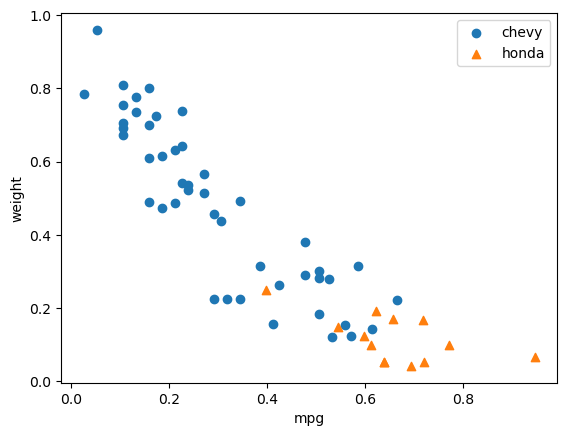

In [100]:
chevy = df.loc[df['make'] == 'chevy']
honda = df.loc[df['make'] == 'honda']

plt.scatter(chevy['mpg'], chevy['weight'], marker='o', label='chevy')
plt.scatter(honda['mpg'], honda['weight'], marker='^', label='honda')
plt.xlabel('mpg')
plt.ylabel('weight')
plt.legend()
plt.show()

Now let's analyze the data using _cosine_ distance.


### __Average Distance__

In [101]:
chevy_data = chevy[['mpg', 'weight']].to_numpy()
honda_data = honda[['mpg', 'weight']].to_numpy()

The average _cosine_ distance between __chevy__ and __chevy__ makes:


In [36]:
avg_distance(chevy_data, chevy_data, cosine)

0.1686029684688174

The average _cosine_ distance between __honda__ and __honda__ makes:


In [37]:
avg_distance(honda_data, honda_data, cosine)

0.017557196207440316

The average _cosine_ distance between __honda__ and __chevy__ makes:


In [38]:
avg_distance(honda_data, chevy_data, cosine)

0.3511900540950527

### __Pairwise Distance__

We can also determine the  pairwise cosine distance  between two points using <code>cosine_distances</code> from <code>sklearn.metrics.pairwise</code>:


In [102]:
from sklearn.metrics.pairwise import cosine_distances

X = np.array([[1, 1]])
Y = np.array([[-1, -1]])
cosine_distances(X, Y)

array([[2.]])

You can derive the **cosine distance** from the **cosine similarity** as follows 

**cosine_distance = 1 - cosine_similarity**


In [103]:
# cosine distance
from sklearn.metrics.pairwise import cosine_similarity

1-cosine_similarity(X,Y)

array([[2.]])

The average pairwise _cosine_ distance between __chevy__ and __chevy__ makes:


In [104]:
cosine_distances(chevy_data, chevy_data).mean()

0.1686029684688178

 between __honda__ and __chevy__ makes:


In [105]:
cosine_distances(honda_data, chevy_data).mean()

0.35119005409505294

## Analyzing Distance Metrics with **DBSCAN**

Now that we've learned various ___numerical___ distance metrics, let's see how they affect a clustering algorithm.

We begin by importing the `DBSCAN` object from `sklearn.neighbors` and downloading a synthetic dataset for clustering:


In [106]:
from sklearn.cluster import DBSCAN
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/data/synthetic_clustering.csv')
df.tail()

,x,y
1099,-0.699095,-0.946115
1100,-0.141684,0.724610
1101,-1.031538,0.445477
1102,0.275647,-1.236686
1103,0.948103,-0.256801


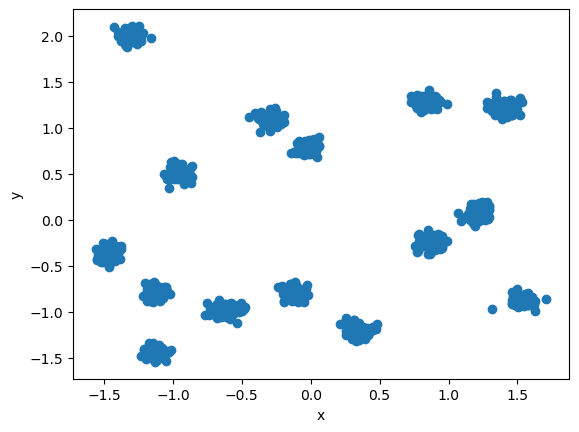

In [107]:
plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### DBSCAN using Euclidean:


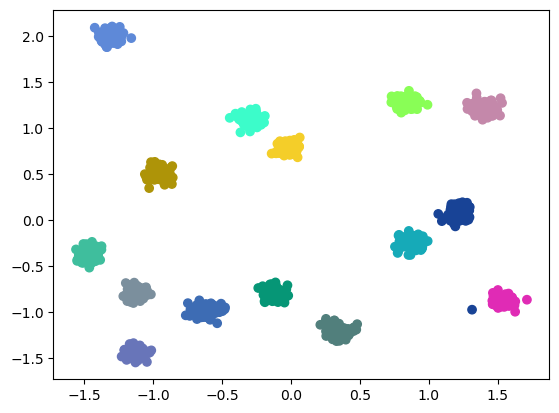

In [108]:
dbscan = DBSCAN(eps=0.1, metric=euclidean) # using Euclidean distance
dbscan.fit(df)

# plot
colors = np.random.random(size=3*(dbscan.labels_.max()+1)).reshape(-1, 3)
plt.scatter(df['x'], df['y'], c=[colors[l] for l in dbscan.labels_])
plt.show()

### DBSCAN using Manhattan:


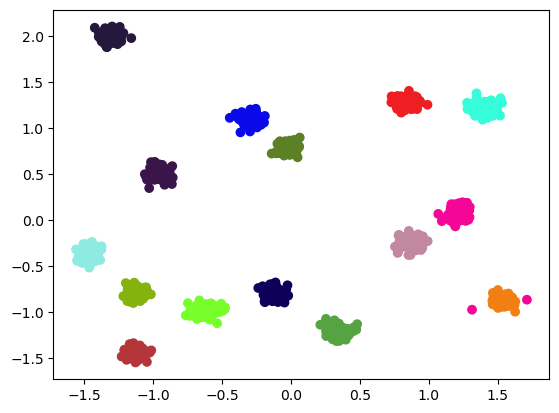

In [109]:
dbscan = DBSCAN(eps=0.1, metric=cityblock) # using Manhattan distance
dbscan.fit(df)

# plot
colors = np.random.random(size=3*(dbscan.labels_.max()+1)).reshape(-1, 3)
plt.scatter(df['x'], df['y'], c=[colors[l] for l in dbscan.labels_])
plt.show()

### DBSCAN using Cosine:


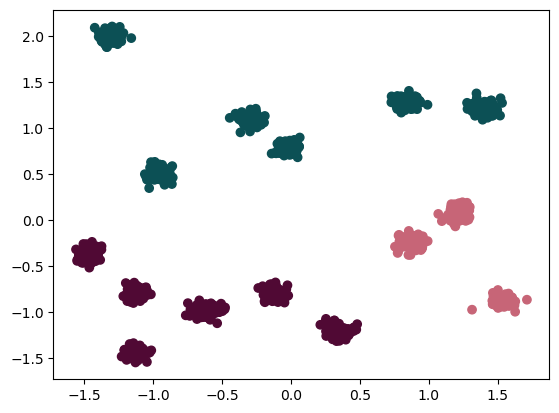

In [110]:
dbscan = DBSCAN(eps=0.1, metric=cosine) # using Cosine distance
dbscan.fit(df)

# plot
colors = np.random.random(size=3*(dbscan.labels_.max()+1)).reshape(-1, 3)
plt.scatter(df['x'], df['y'], c=[colors[l] for l in dbscan.labels_])
plt.show()

Clearly, euclidean and manhattan distances have very similar results.

However, using cosine distance, DBSCAN groups points based on their angle, leading to unique results which is some cases may be very useful.


## Jaccard Distance


In this task, you will learn and practice applying Jaccard distance.

The Jaccard distance is used to compute the dissimilarity/distance of two sets of objects.

The Jaccard distance between two sets is a value in the range $[0, 1]$ where:
 * $1$ means the two sets have nothing in common.
 * $0$ means the two sets are identical.
 
So **the greater the jaccard distance, the less similar the sets**.

_Jaccard distance is useful when comparing two sets of (usually) non-numerical objects_

### <a id='jaccard_GE'></a> General Equation

The __general equation for the jaccard distance__ between two sets $A$ and $B$ is:

$$1 - \frac{|A \cap B|}{|A \cup B|}$$

 * $\cap$ means "set intersection"
 * $\cup$ means "union"
 * $| S |$ means the "length of set $S$"


We can use `sklearn.metrics.jaccard_score` to compute the jaccard distance between categorical data. 

**NOTE**: `sklearn.metrics.jaccard_score` calculates the **jaccard similarity score**, which is **1 - jaccard distance**.


In [111]:
from sklearn.metrics import jaccard_score

For this exercise, we will use a different dataset.

Download the dataset `"breast-cancer.data"` which contains information about people diagnosed with breast cancer:


In [112]:
df = pd.read_csv(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/breast-cancer.data',
    header=None,
    names=['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat'])
df.tail()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no
285,recurrence-events,50-59,ge40,30-34,3-5,no,3,left,left_low,no


Lets look at the unique age groups in this dataset:


In [113]:
print(sorted(df['age'].unique()))
print(df.age.value_counts())

['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
50-59    96
40-49    90
60-69    57
30-39    36
70-79     6
20-29     1
Name: age, dtype: int64


As you can see, the data values are __categorical__ rather than real numerical values.

To obtain the **average jaccard distance** between two dataframes (**df1, df2**), we first need to convert the categorical variables into one-hot encoded (binary) variables. This allows us to easily compute the individual jaccard distance between each row in **df1** and other row in **df2**, since we could just view the rows as sets that contain 0's and 1's.

We can achieve this using the `OneHotEncoder` from `sklearn.preprocessing`:


In [114]:
from sklearn.preprocessing import OneHotEncoder

OH = OneHotEncoder()

In [115]:
X = OH.fit_transform(df.loc[:, df.columns != 'age']).toarray()
print(f"By using onehot encoding, we obtained a 2d array with shape {X.shape} that only has value 0 and 1 ")

By using onehot encoding, we obtained a 2d array with shape (286, 39) that only has value 0 and 1 


We will be analyzing the _Jaccard_ distance of the set of people aged 30-39 and aged 60-69.


In [116]:
X30to39 = X[df[df.age == '30-39'].index]
X60to69 = X[df[df.age == '60-69'].index]

X30to39.shape, X60to69.shape

((36, 39), (57, 39))

Average Jaccard distance between people aged __30-39__ and __30-39__:


In [119]:
avg_distance(X30to39, X30to39, jaccard_score)

0.6435631883548536

Average Jaccard distance between people aged __60-69__ and __60-69__:


In [120]:
avg_distance(X60to69, X60to69, jaccard_score)

0.6182114564956281

Average Jaccard distance between people aged __30-39__ and __60-69__:


In [121]:
avg_distance(X30to39, X60to69, jaccard_score)

0.7324778699972173

Therefore, it seems there are some disparate trends between the 30-39 and 60-69 age groups.


### Other Contributors


[Roxanne Li](https://www.linkedin.com/in/roxanne-li/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) is a Data Science intern at IBM Skills Network, entering level-5 study in the Mathematics & Statistics undergraduate Coop program at McMaster University.


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2021-12-20|0.1|Sam Prokopchuk|Complete Exercises' content|
|2022-05-24|0.1|Roxanne Li|Review and edit|
|2022-07-18|0.1|Svitlana K |Review and edit|


Copyright © 2021 IBM Corporation. All rights reserved.
